<h2 align=center> Principal Component Analysis with numpy functions</h2>

### In this project, I will apply PCA to a dataset without using any of the popular machine learning libraries such as scikit-learn and statsmodels. 

### Load the Data and Libraries


In [22]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
plt.style.use("ggplot")
plt.rcParams["figure.figsize"] = (12,8)

In [3]:
# Data from URL: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data

iris = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data",
                  header=None)


###  Analyze Data

In [4]:
iris.columns = ["sepal_length","sepal_width",'petal_length','petal_width','species']
iris.dropna(how='all', inplace=True)
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [6]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Visualize the Data

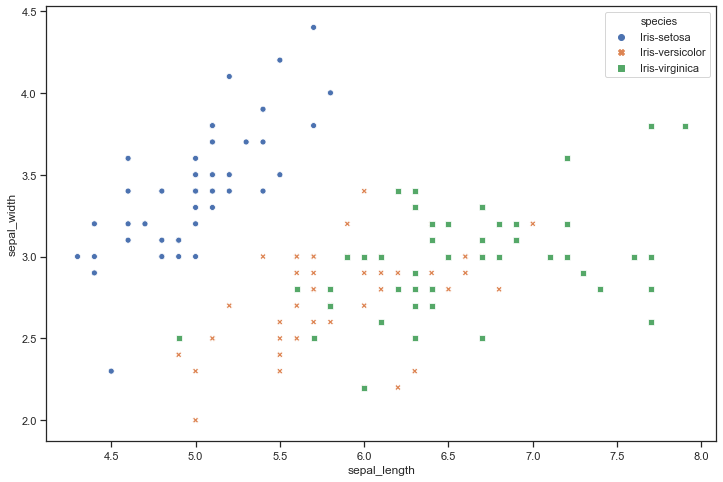

In [7]:
# Ploting the data using seaborn

sns.set(style="ticks")
sns.scatterplot(x = iris.sepal_length, y=iris.sepal_width,
               hue = iris.species, style=iris.species)

### Standardize the Data

In [8]:
# Select all rows, first 4 columns

X = iris.iloc[:, 0:4].values
y = iris.species.values

In [9]:
# It is needed to process the data before applying PCA

from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit_transform(X)

### Compute the Eigenvectors and Eigenvalues

Covariance: $\sigma_{jk} = \frac{1}{n-1}\sum_{i=1}^{N}(x_{ij}-\bar{x_j})(x_{ik}-\bar{x_k})$

Coviance matrix: $Σ = \frac{1}{n-1}((X-\bar{x})^T(X-\bar{x}))$

In [10]:
# Calculate the covariance matrix first

covariance_matrix = np.cov(X.T)   # The result is a Positive semidefinite matrix
print("Covariance matrix: \n",covariance_matrix)

Covariance matrix: 
 [[ 1.00671141 -0.11010327  0.87760486  0.82344326]
 [-0.11010327  1.00671141 -0.42333835 -0.358937  ]
 [ 0.87760486 -0.42333835  1.00671141  0.96921855]
 [ 0.82344326 -0.358937    0.96921855  1.00671141]]


Eigendecomposition of the covriance matrix:  $Σ = W\wedge W^{-1}$

In [11]:
# Eigendecomposition of the covariance

eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)

print("Eigenvector: \n",eigen_vectors,"\n")
print("Eigenvalues: \n", eigen_values, "\n")

Eigenvector: 
 [[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]] 

Eigenvalues: 
 [2.93035378 0.92740362 0.14834223 0.02074601] 



#### Singular Value Decomposition (SVD) 

In [12]:
# Implement SVD is another technique to get eigenvectors
# eigenvalues are going to be the square in s
# and the principal components are the same as above

eigen_vec_svd, s, v = np.linalg.svd(X.T)
print(eigen_vec_svd)

[[-0.52237162 -0.37231836  0.72101681  0.26199559]
 [ 0.26335492 -0.92555649 -0.24203288 -0.12413481]
 [-0.58125401 -0.02109478 -0.14089226 -0.80115427]
 [-0.56561105 -0.06541577 -0.6338014   0.52354627]]


### Pick Principal Components Using the Explained Variance

In [13]:
# Calculate the variance explained on each of those components

variance_explained = [(i/sum(eigen_values))*100 for i in eigen_values]

variance_explained


[72.77045209380135, 23.03052326768065, 3.683831957627379, 0.5151926808906321]

In [14]:
# Calculate the cumulative sum of variance explained

cumulative_variance_explained = np.cumsum(variance_explained)
cumulative_variance_explained


array([ 72.77045209,  95.80097536,  99.48480732, 100.        ])

#### I will use two components , those  are able to capture 95.80% of the data

Text(0.5, 1.0, 'Explained variance vs Number of components')

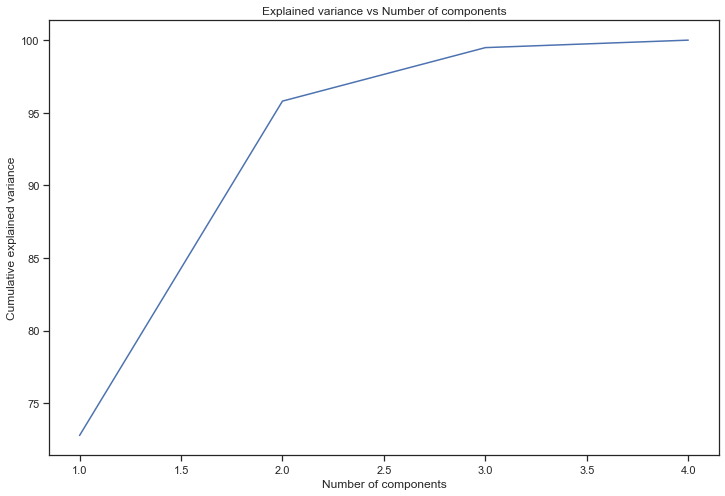

In [15]:
sns.lineplot(x = [1,2,3,4], y=cumulative_variance_explained)

plt.xlabel("Number of components")
plt.ylabel("Cumulative explained variance")

plt.title("Explained variance vs Number of components")


### Project Data Onto Lower-Dimensional Linear Subspace

In [16]:
# Print components or eigenvectors

eigen_vectors

array([[ 0.52237162, -0.37231836, -0.72101681,  0.26199559],
       [-0.26335492, -0.92555649,  0.24203288, -0.12413481],
       [ 0.58125401, -0.02109478,  0.14089226, -0.80115427],
       [ 0.56561105, -0.06541577,  0.6338014 ,  0.52354627]])

In [17]:
#Taking two components and create a projection matrix

projection_matrix = (eigen_vectors.T[:][:2]).T
projection_matrix

array([[ 0.52237162, -0.37231836],
       [-0.26335492, -0.92555649],
       [ 0.58125401, -0.02109478],
       [ 0.56561105, -0.06541577]])

In [18]:
# PCA Transformation
# Calculate the product of X (standardized original data multiply by eigenvectors)

X_pca = X.dot(projection_matrix)

In [19]:
#Print first 20 rows of X_pca

X_pca[:20]

array([[-2.26454173, -0.5057039 ],
       [-2.0864255 ,  0.65540473],
       [-2.36795045,  0.31847731],
       [-2.30419716,  0.57536771],
       [-2.38877749, -0.6747674 ],
       [-2.07053681, -1.51854856],
       [-2.44571134, -0.07456268],
       [-2.23384186, -0.24761393],
       [-2.34195768,  1.09514636],
       [-2.18867576,  0.44862905],
       [-2.16348656, -1.07059558],
       [-2.32737775, -0.15858745],
       [-2.22408272,  0.70911816],
       [-2.63971626,  0.93828198],
       [-2.19229151, -1.88997851],
       [-2.25146521, -2.72237108],
       [-2.20275048, -1.51375028],
       [-2.19017916, -0.51430431],
       [-1.89407429, -1.43111071],
       [-2.33994907, -1.15803343]])

**Now the PCA components can be used in any analysis exactly as the features are used.**

In [20]:
iris['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

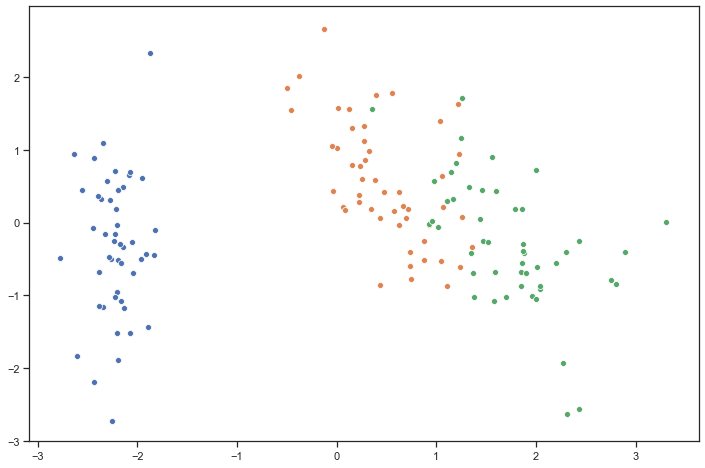

In [21]:
#for species in ('Iris-setosa','Iris-versicolor','Iris-virginica'):
for species in iris['species'].unique():
    sns.scatterplot(X_pca[y==species, 0],
                   X_pca[y==species, 1]
                   )

**By: [Wendy Navarrete](http://wendynavarrete.com)**

May 24, 2020